# 📊 Análisis Multivariante - Panel Maestro UPV

## Objetivo

Explorar relaciones complejas entre variables académicas mediante:
- Matriz de correlaciones
- Visualizaciones avanzadas
- Reducción de dimensionalidad (PCA)
- Detección de agrupamientos
- Interpretación de asociaciones

**Dataset:** Panel Maestro UPV Limpio (483 × 16)  
**Variables:** 11 numéricas + 5 categóricas

## 1. Carga y Preparación de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

print('✅ Librerías cargadas')

✅ Librerías cargadas


In [2]:
# Cargar datos limpios
df = pd.read_csv('../panel_maestro_UPV_LIMPIO.csv', encoding='utf-8')

print('\n📊 CARGA DE DATOS')
print('='*100)
print(f'  • Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas')
print(f'  • Valores faltantes: {df.isnull().sum().sum()} (0% ✅)')
print(f'\nColumnas:')
for col in df.columns:
    print(f'    • {col}: {df[col].dtype}')


📊 CARGA DE DATOS
  • Dimensiones: 483 filas × 16 columnas
  • Valores faltantes: 0 (0% ✅)

Columnas:
    • CURSO: object
    • COD_RUCT: int64
    • TITULACION: object
    • CENTRO: object
    • año: int64
    • satisfaccion_alumnos: float64
    • satisfaccion_profesores: float64
    • diferencia_satis: float64
    • satisfaccion_promedio: float64
    • tasa_abandono: float64
    • tasa_permanencia: float64
    • autoeficacia_3_anos: float64
    • nivel_autoeficacia: object
    • porcentaje_no_desempleados: float64
    • porcentaje_desempleados: float64
    • nivel_empleabilidad: object


In [3]:
# Seleccionar variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f'\n🔢 VARIABLES NUMÉRICAS ({len(numeric_cols)}):' )
for col in numeric_cols:
    print(f'    • {col}')

print(f'\n📝 VARIABLES CATEGÓRICAS ({len(categorical_cols)}):' )
for col in categorical_cols:
    print(f'    • {col}')

# Dataset solo con numéricas
df_numeric = df[numeric_cols]
print(f'\n✅ Dataset numérico: {df_numeric.shape}')


🔢 VARIABLES NUMÉRICAS (11):
    • COD_RUCT
    • año
    • satisfaccion_alumnos
    • satisfaccion_profesores
    • diferencia_satis
    • satisfaccion_promedio
    • tasa_abandono
    • tasa_permanencia
    • autoeficacia_3_anos
    • porcentaje_no_desempleados
    • porcentaje_desempleados

📝 VARIABLES CATEGÓRICAS (5):
    • CURSO
    • TITULACION
    • CENTRO
    • nivel_autoeficacia
    • nivel_empleabilidad

✅ Dataset numérico: (483, 11)


## 2. Matriz de Correlaciones

In [4]:
print('\n📊 MATRIZ DE CORRELACIONES')
print('='*100)

# Calcular correlaciones
corr_matrix = df_numeric.corr()

print(f'\nDimensión: {corr_matrix.shape[0]} × {corr_matrix.shape[1]}')
print(f'Correlación media: {corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)].mean():.3f}')

# Mostrar correlaciones fuertes (|r| > 0.5)
print('\n⭐ CORRELACIONES FUERTES (|r| > 0.5):')
print('-'*100)

strong_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.5:
            strong_corr.append({
                'var1': corr_matrix.columns[i],
                'var2': corr_matrix.columns[j],
                'corr': corr_matrix.iloc[i, j]
            })

if strong_corr:
    for item in sorted(strong_corr, key=lambda x: abs(x['corr']), reverse=True):
        print(f"  {item['var1']} ↔ {item['var2']}: {item['corr']:.3f}")
else:
    print('  No hay correlaciones fuertes (|r| > 0.5)')

# Mostrar correlaciones moderadas (0.3 < |r| <= 0.5)
print('\n📈 CORRELACIONES MODERADAS (0.3 < |r| <= 0.5):')
print('-'*100)

moderate_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = abs(corr_matrix.iloc[i, j])
        if 0.3 < corr_val <= 0.5:
            moderate_corr.append({
                'var1': corr_matrix.columns[i],
                'var2': corr_matrix.columns[j],
                'corr': corr_matrix.iloc[i, j]
            })

if moderate_corr:
    for item in sorted(moderate_corr, key=lambda x: abs(x['corr']), reverse=True)[:10]:
        print(f"  {item['var1']} ↔ {item['var2']}: {item['corr']:.3f}")
else:
    print('  No hay correlaciones moderadas')

print('\n✅ Matriz de correlaciones calculada')


📊 MATRIZ DE CORRELACIONES

Dimensión: 11 × 11
Correlación media: -0.006

⭐ CORRELACIONES FUERTES (|r| > 0.5):
----------------------------------------------------------------------------------------------------
  porcentaje_no_desempleados ↔ porcentaje_desempleados: -1.000
  tasa_abandono ↔ tasa_permanencia: -1.000
  satisfaccion_alumnos ↔ satisfaccion_promedio: 0.918
  satisfaccion_alumnos ↔ diferencia_satis: -0.867
  diferencia_satis ↔ satisfaccion_promedio: -0.637
  satisfaccion_profesores ↔ satisfaccion_promedio: 0.587

📈 CORRELACIONES MODERADAS (0.3 < |r| <= 0.5):
----------------------------------------------------------------------------------------------------
  COD_RUCT ↔ satisfaccion_profesores: 0.400
  autoeficacia_3_anos ↔ porcentaje_no_desempleados: 0.339
  autoeficacia_3_anos ↔ porcentaje_desempleados: -0.339

✅ Matriz de correlaciones calculada


## 3. Visualización: Heatmap de Correlaciones

✅ Heatmap guardado: 01_heatmap_correlaciones.png


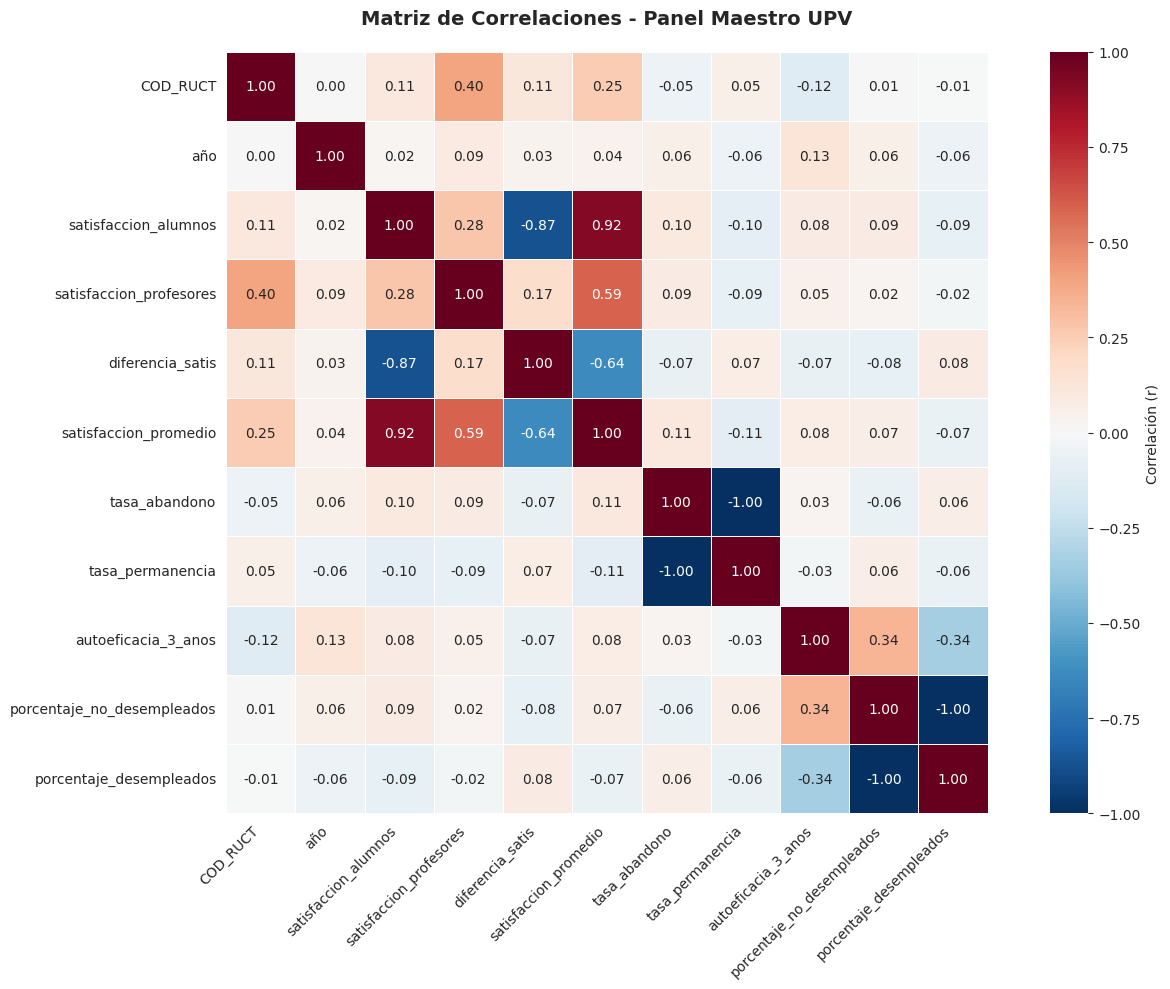

In [5]:
# Heatmap de correlaciones
fig, ax = plt.subplots(figsize=(14, 10))

# Crear heatmap
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='RdBu_r',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={'label': 'Correlación (r)'},
            vmin=-1, vmax=1,
            ax=ax)

plt.title('Matriz de Correlaciones - Panel Maestro UPV', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('01_heatmap_correlaciones.png', dpi=300, bbox_inches='tight')
print('✅ Heatmap guardado: 01_heatmap_correlaciones.png')
plt.show()

## 4. Visualización: Pairplot Selectivo

In [6]:
# Seleccionar variables clave para pairplot
# Satisfacción, Abandono, Autoeficacia, Empleabilidad
key_vars = [
    'satisfaccion_alumnos',
    'satisfaccion_profesores',
    'tasa_abandono',
    'autoeficacia_3_anos',
    'porcentaje_no_desempleados'
]

df_key = df[key_vars]

print(f'\n🎯 Creando pairplot de {len(key_vars)} variables clave...')
print(f'   Variables: {key_vars}')


🎯 Creando pairplot de 5 variables clave...
   Variables: ['satisfaccion_alumnos', 'satisfaccion_profesores', 'tasa_abandono', 'autoeficacia_3_anos', 'porcentaje_no_desempleados']


✅ Pairplot guardado: 02_pairplot_variables_clave.png


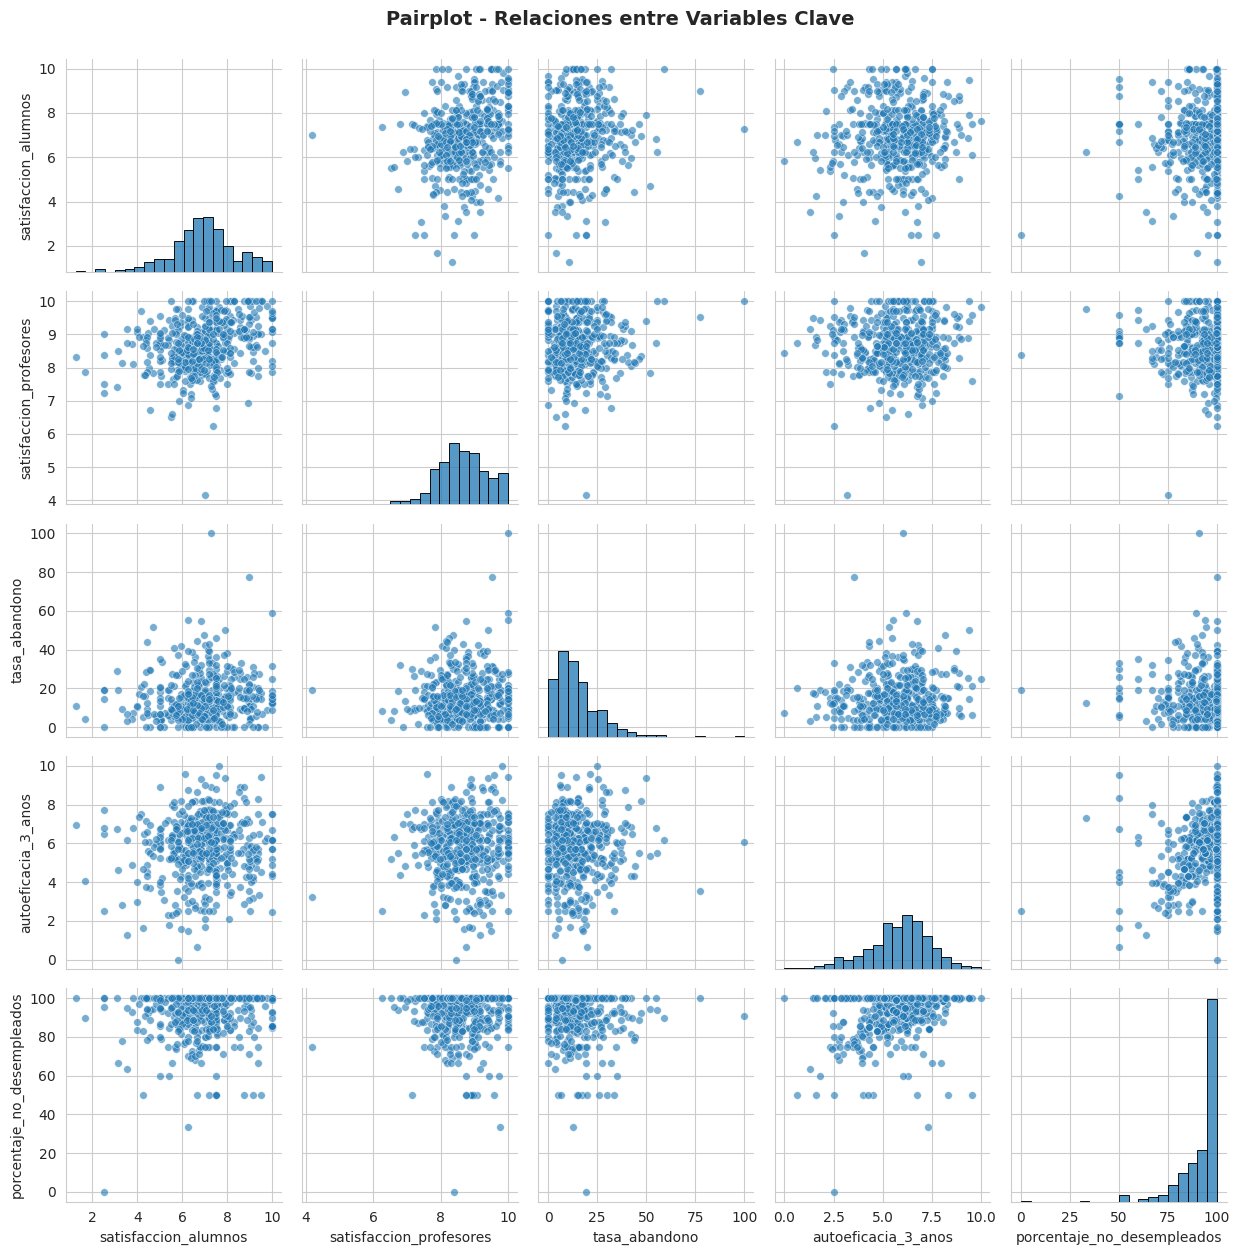

In [7]:
# Pairplot (puede tomar tiempo)
pairplot = sns.pairplot(df_key, 
                        diag_kind='hist',
                        plot_kws={'alpha': 0.6, 's': 30},
                        diag_kws={'bins': 20, 'edgecolor': 'black'})

pairplot.fig.suptitle('Pairplot - Relaciones entre Variables Clave', 
                      fontsize=14, fontweight='bold', y=1.0)

plt.tight_layout()
plt.savefig('02_pairplot_variables_clave.png', dpi=300, bbox_inches='tight')
print('✅ Pairplot guardado: 02_pairplot_variables_clave.png')
plt.show()

## 5. Reducción de Dimensionalidad: PCA

In [8]:
print('\n🔬 ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)')
print('='*100)

# Estandarizar datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)
print(f'\n  Datos estandarizados: Media={df_scaled.mean():.6f}, Std={df_scaled.std():.6f}')

# Aplicar PCA completo
pca_full = PCA()
pca_full.fit(df_scaled)

# Varianza explicada
var_exp = pca_full.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

print(f'\n  Componentes: {len(var_exp)}')
print(f'\n  Varianza explicada por componente:')
for i, (ve, cve) in enumerate(zip(var_exp[:5], cum_var_exp[:5])):
    print(f"    PC{i+1}: {ve*100:.1f}% (acumulada: {cve*100:.1f}%)")

print(f'\n  Componentes para 95% varianza: {np.argmax(cum_var_exp >= 0.95) + 1}')
print(f'  Componentes para 90% varianza: {np.argmax(cum_var_exp >= 0.90) + 1}')

print('\n✅ PCA completado')


🔬 ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)

  Datos estandarizados: Media=0.000000, Std=1.000000

  Componentes: 11

  Varianza explicada por componente:
    PC1: 26.3% (acumulada: 26.3%)
    PC2: 20.3% (acumulada: 46.6%)
    PC3: 17.1% (acumulada: 63.7%)
    PC4: 14.0% (acumulada: 77.7%)
    PC5: 9.3% (acumulada: 87.0%)

  Componentes para 95% varianza: 7
  Componentes para 90% varianza: 6

✅ PCA completado


✅ Gráfico de varianza guardado: 03_pca_varianza_explicada.png


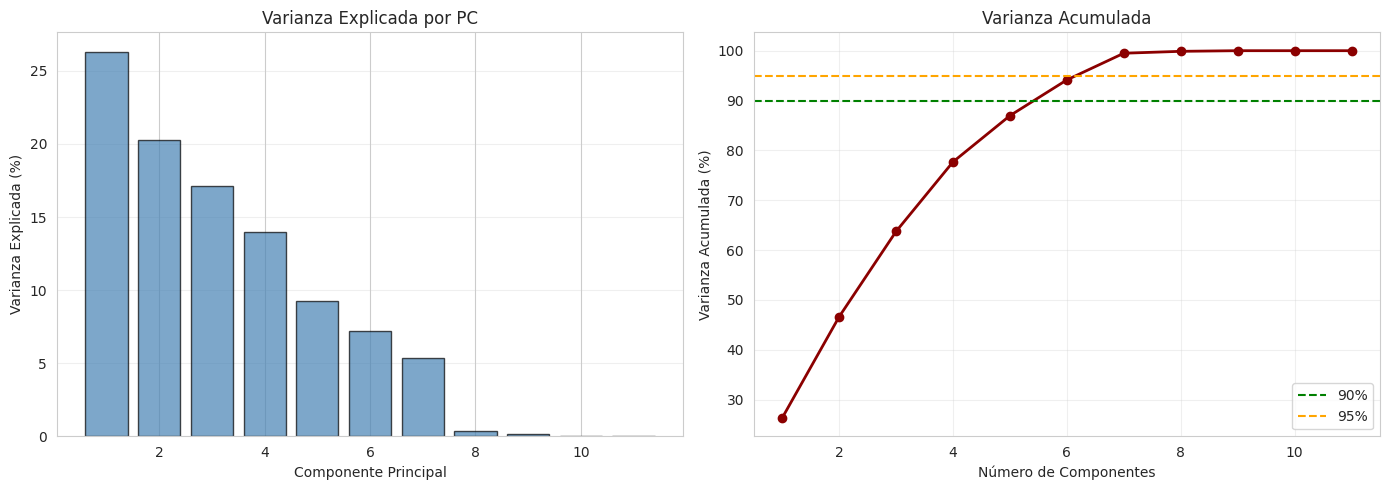

In [9]:
# Gráfico: Varianza explicada
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Varianza individual
axes[0].bar(range(1, len(var_exp)+1), var_exp*100, alpha=0.7, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Componente Principal')
axes[0].set_ylabel('Varianza Explicada (%)')
axes[0].set_title('Varianza Explicada por PC')
axes[0].grid(axis='y', alpha=0.3)

# Varianza acumulada
axes[1].plot(range(1, len(cum_var_exp)+1), cum_var_exp*100, 'o-', linewidth=2, markersize=6, color='darkred')
axes[1].axhline(y=90, color='green', linestyle='--', label='90%')
axes[1].axhline(y=95, color='orange', linestyle='--', label='95%')
axes[1].set_xlabel('Número de Componentes')
axes[1].set_ylabel('Varianza Acumulada (%)')
axes[1].set_title('Varianza Acumulada')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('03_pca_varianza_explicada.png', dpi=300, bbox_inches='tight')
print('✅ Gráfico de varianza guardado: 03_pca_varianza_explicada.png')
plt.show()


PCA 2D: 46.6% varianza explicada


✅ Scatter plot PCA guardado: 04_pca_2d_scatter.png


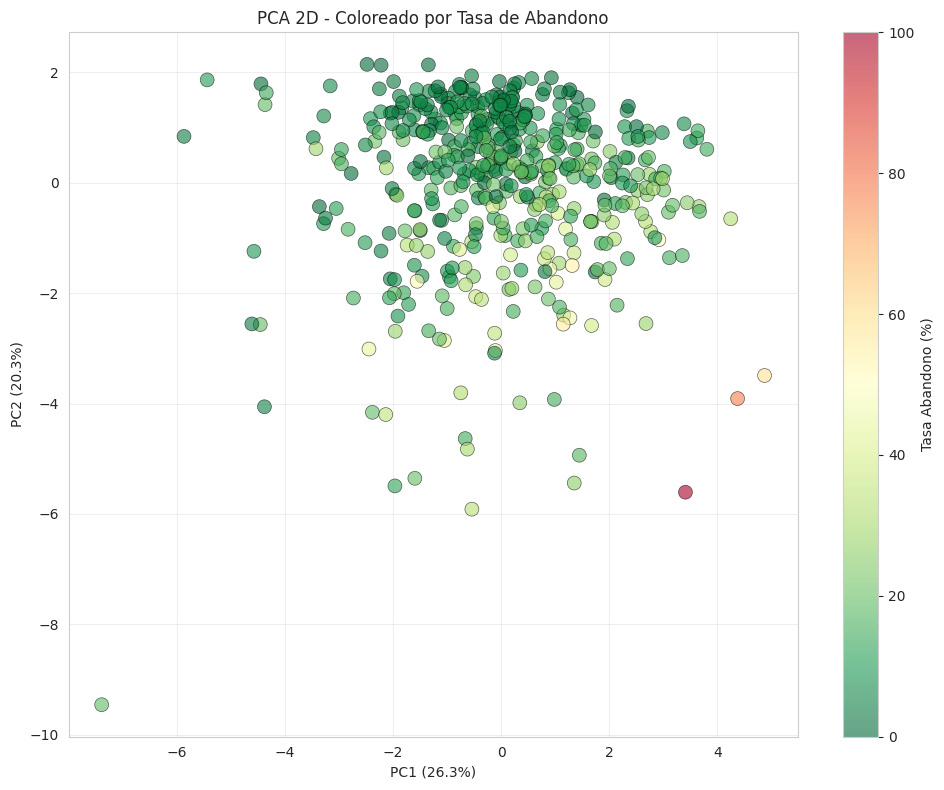

In [10]:
# PCA con 2 componentes para visualización
pca_2d = PCA(n_components=2)
pca_2d.fit(df_scaled)
points_2d = pca_2d.transform(df_scaled)

print(f'\nPCA 2D: {pca_2d.explained_variance_ratio_.sum()*100:.1f}% varianza explicada')

# Gráfico de dispersión PCA
fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(points_2d[:, 0], points_2d[:, 1], 
                     c=df['tasa_abandono'], 
                     cmap='RdYlGn_r',
                     s=100, alpha=0.6, edgecolors='black', linewidth=0.5)

ax.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)')
ax.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)')
ax.set_title('PCA 2D - Coloreado por Tasa de Abandono')
ax.grid(alpha=0.3)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Tasa Abandono (%)')

plt.tight_layout()
plt.savefig('04_pca_2d_scatter.png', dpi=300, bbox_inches='tight')
print('✅ Scatter plot PCA guardado: 04_pca_2d_scatter.png')
plt.show()


Cargas (loadings) de variables en PC1 y PC2:
                              PC1    PC2
COD_RUCT                    0.199 -0.052
año                         0.088  0.057
satisfaccion_alumnos        0.932 -0.094
satisfaccion_profesores     0.441 -0.113
diferencia_satis           -0.741  0.038
satisfaccion_promedio       0.929 -0.125
tasa_abandono               0.280 -0.544
tasa_permanencia           -0.280  0.544
autoeficacia_3_anos         0.225  0.429
porcentaje_no_desempleados  0.294  0.842
porcentaje_desempleados    -0.294 -0.842


✅ Biplot PCA guardado: 05_pca_biplot.png


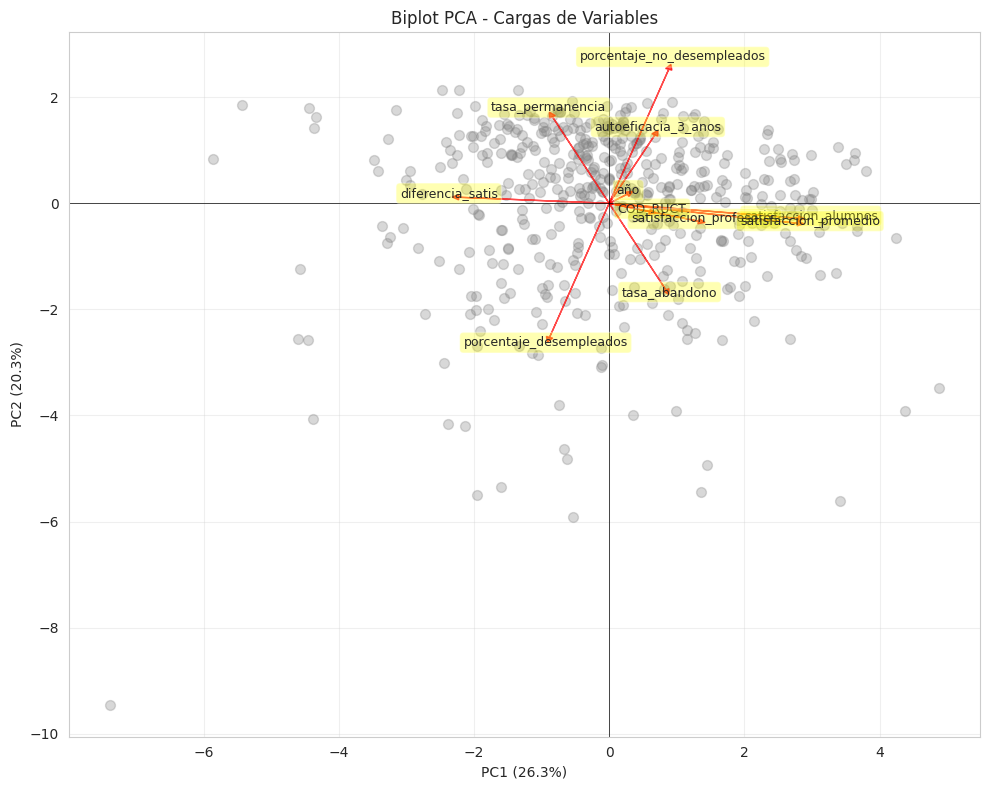

In [11]:
# Cargas de componentes principales
loadings = pca_2d.components_.T * np.sqrt(pca_2d.explained_variance_)
loading_matrix = pd.DataFrame(
    loadings,
    columns=['PC1', 'PC2'],
    index=numeric_cols
)

print('\nCargas (loadings) de variables en PC1 y PC2:')
print(loading_matrix.round(3))

# Gráfico de cargas (biplot)
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter de puntos
ax.scatter(points_2d[:, 0], points_2d[:, 1], alpha=0.3, s=50, color='gray')

# Vectores de cargas
for i, var in enumerate(numeric_cols):
    ax.arrow(0, 0, loadings[i, 0]*3, loadings[i, 1]*3,
             head_width=0.1, head_length=0.1, fc='red', ec='red', alpha=0.7)
    ax.text(loadings[i, 0]*3.2, loadings[i, 1]*3.2, var, 
            fontsize=9, ha='center', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))

ax.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)')
ax.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)')
ax.set_title('Biplot PCA - Cargas de Variables')
ax.grid(alpha=0.3)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.savefig('05_pca_biplot.png', dpi=300, bbox_inches='tight')
print('✅ Biplot PCA guardado: 05_pca_biplot.png')
plt.show()

## 6. Detección de Agrupamientos: Clustering

In [12]:
print('\n🔍 DETECCIÓN DE AGRUPAMIENTOS (K-MEANS)')
print('='*100)

# Método del codo para encontrar k óptimo
inertias = []
silhouette_scores = []
K_range = range(2, 11)

from sklearn.metrics import silhouette_score

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

print(f'\n  K óptimo (silhouette):',  K_range[np.argmax(silhouette_scores)])
print(f'  Silhouette score máximo: {max(silhouette_scores):.3f}')

# Usar k=3 para el análisis
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)

print(f'\n  Clusters K={k_optimal}:')
unique, counts = np.unique(clusters, return_counts=True)
for cluster_id, count in zip(unique, counts):
    print(f"    Cluster {cluster_id}: {count} programas ({count/len(clusters)*100:.1f}%)")

print('\n✅ K-means completado')


🔍 DETECCIÓN DE AGRUPAMIENTOS (K-MEANS)



  K óptimo (silhouette): 5
  Silhouette score máximo: 0.198

  Clusters K=3:
    Cluster 0: 66 programas (13.7%)
    Cluster 1: 159 programas (32.9%)
    Cluster 2: 258 programas (53.4%)

✅ K-means completado


✅ Gráfico de codo y silhouette guardado


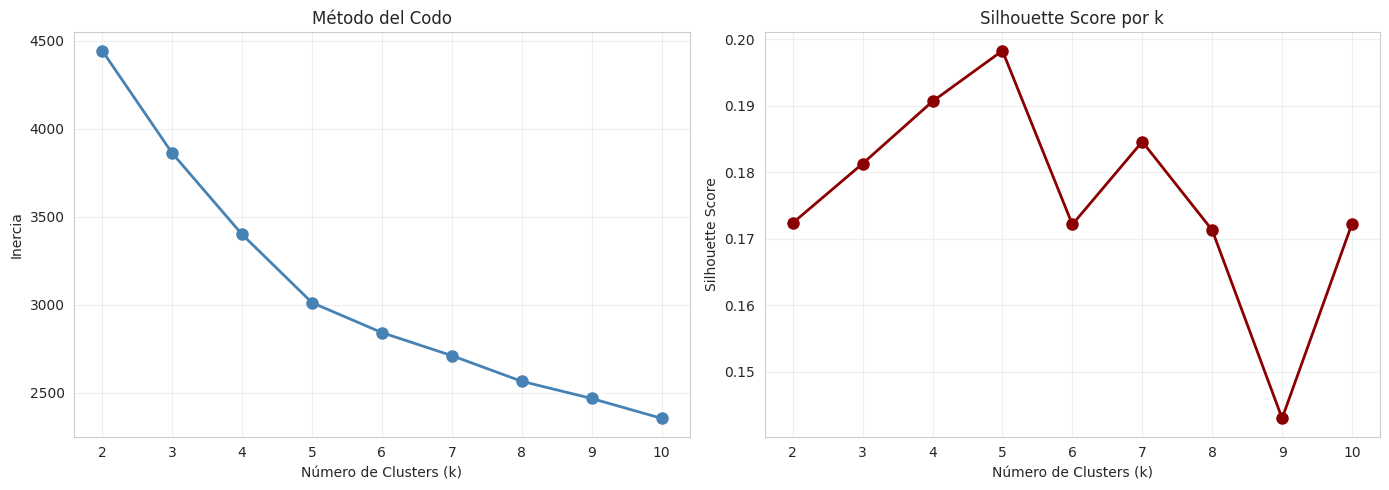

In [13]:
# Gráfico del método del codo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Método del codo
axes[0].plot(K_range, inertias, 'o-', linewidth=2, markersize=8, color='steelblue')
axes[0].set_xlabel('Número de Clusters (k)')
axes[0].set_ylabel('Inercia')
axes[0].set_title('Método del Codo')
axes[0].grid(alpha=0.3)

# Silhouette score
axes[1].plot(K_range, silhouette_scores, 'o-', linewidth=2, markersize=8, color='darkred')
axes[1].set_xlabel('Número de Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score por k')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('06_kmeans_elbow_silhouette.png', dpi=300, bbox_inches='tight')
print('✅ Gráfico de codo y silhouette guardado')
plt.show()

✅ Gráfico de clusters en PCA guardado


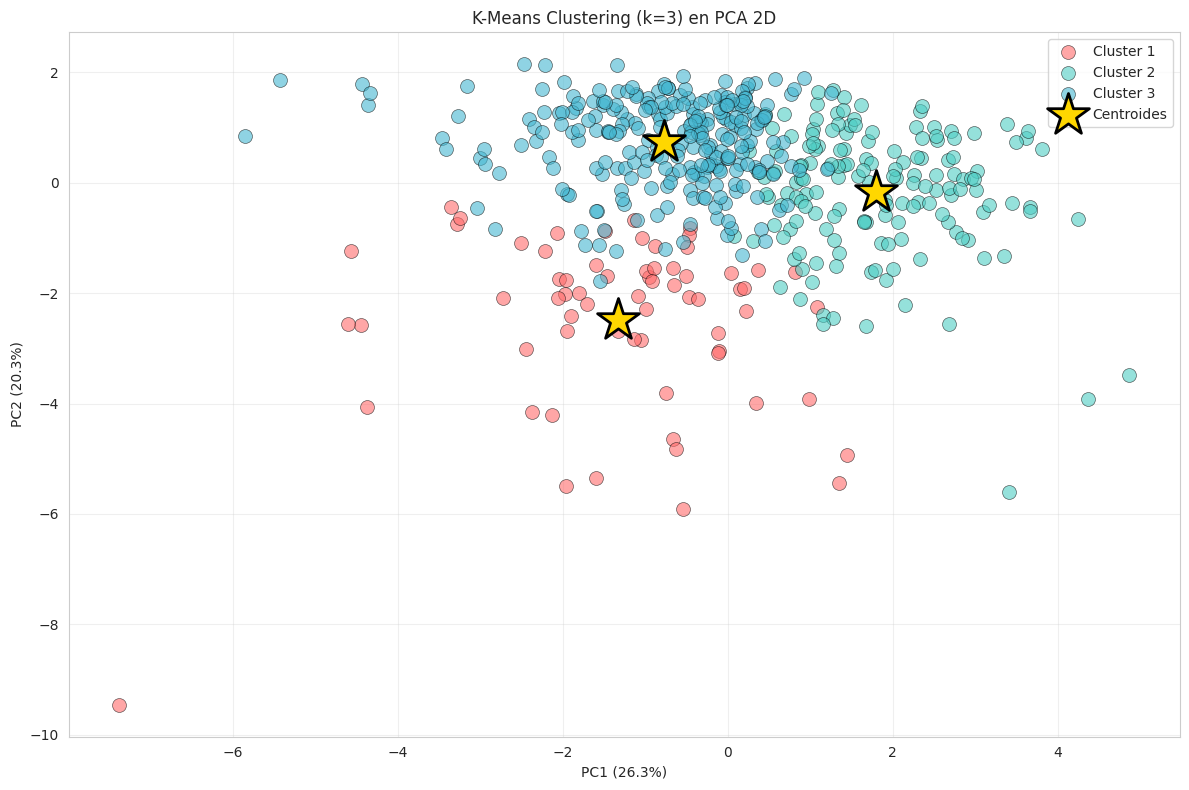

In [14]:
# Visualizar clusters en PCA 2D
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
for i in range(k_optimal):
    mask = clusters == i
    ax.scatter(points_2d[mask, 0], points_2d[mask, 1],
               label=f'Cluster {i+1}', s=100, alpha=0.6,
               color=colors[i], edgecolors='black', linewidth=0.5)

# Centros de clusters
centers_2d = pca_2d.transform(kmeans.cluster_centers_)
ax.scatter(centers_2d[:, 0], centers_2d[:, 1],
           marker='*', s=1000, c='gold', edgecolors='black', linewidth=2,
           label='Centroides', zorder=5)

ax.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)')
ax.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)')
ax.set_title('K-Means Clustering (k=3) en PCA 2D')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('07_clusters_pca_2d.png', dpi=300, bbox_inches='tight')
print('✅ Gráfico de clusters en PCA guardado')
plt.show()

## 7. Caracterización de Clusters

In [15]:
print('\n🎯 CARACTERIZACIÓN DE CLUSTERS')
print('='*100)

# Añadir cluster al dataframe
df['cluster'] = clusters

# Estadísticas por cluster
for i in range(k_optimal):
    cluster_data = df_numeric[clusters == i]
    print(f'\n📌 CLUSTER {i+1} ({len(cluster_data)} programas):')
    print('-'*100)
    
    for col in numeric_cols:
        mean_val = cluster_data[col].mean()
        global_mean = df_numeric[col].mean()
        diff = mean_val - global_mean
        print(f"  {col}:")
        print(f"    Media: {mean_val:.2f} (Global: {global_mean:.2f}, Dif: {diff:+.2f})")


🎯 CARACTERIZACIÓN DE CLUSTERS

📌 CLUSTER 1 (66 programas):
----------------------------------------------------------------------------------------------------
  COD_RUCT:
    Media: 3489155.30 (Global: 3675684.25, Dif: -186528.94)
  año:
    Media: 2021.32 (Global: 2021.55, Dif: -0.24)
  satisfaccion_alumnos:
    Media: 6.42 (Global: 6.92, Dif: -0.51)
  satisfaccion_profesores:
    Media: 8.45 (Global: 8.65, Dif: -0.20)
  diferencia_satis:
    Media: 2.11 (Global: 1.75, Dif: +0.36)
  satisfaccion_promedio:
    Media: 7.47 (Global: 7.78, Dif: -0.31)
  tasa_abandono:
    Media: 16.73 (Global: 14.63, Dif: +2.10)
  tasa_permanencia:
    Media: 83.27 (Global: 85.37, Dif: -2.10)
  autoeficacia_3_anos:
    Media: 4.19 (Global: 5.80, Dif: -1.61)
  porcentaje_no_desempleados:
    Media: 70.24 (Global: 92.13, Dif: -21.89)
  porcentaje_desempleados:
    Media: 29.76 (Global: 7.87, Dif: +21.89)

📌 CLUSTER 2 (159 programas):
------------------------------------------------------------------------

## 8. Análisis Jerárquico


🌳 CLUSTERING JERÁRQUICO

  Linkage matrix calculada (muestra: 50 programas)


✅ Dendrograma guardado: 08_dendrograma_jerarquico.png


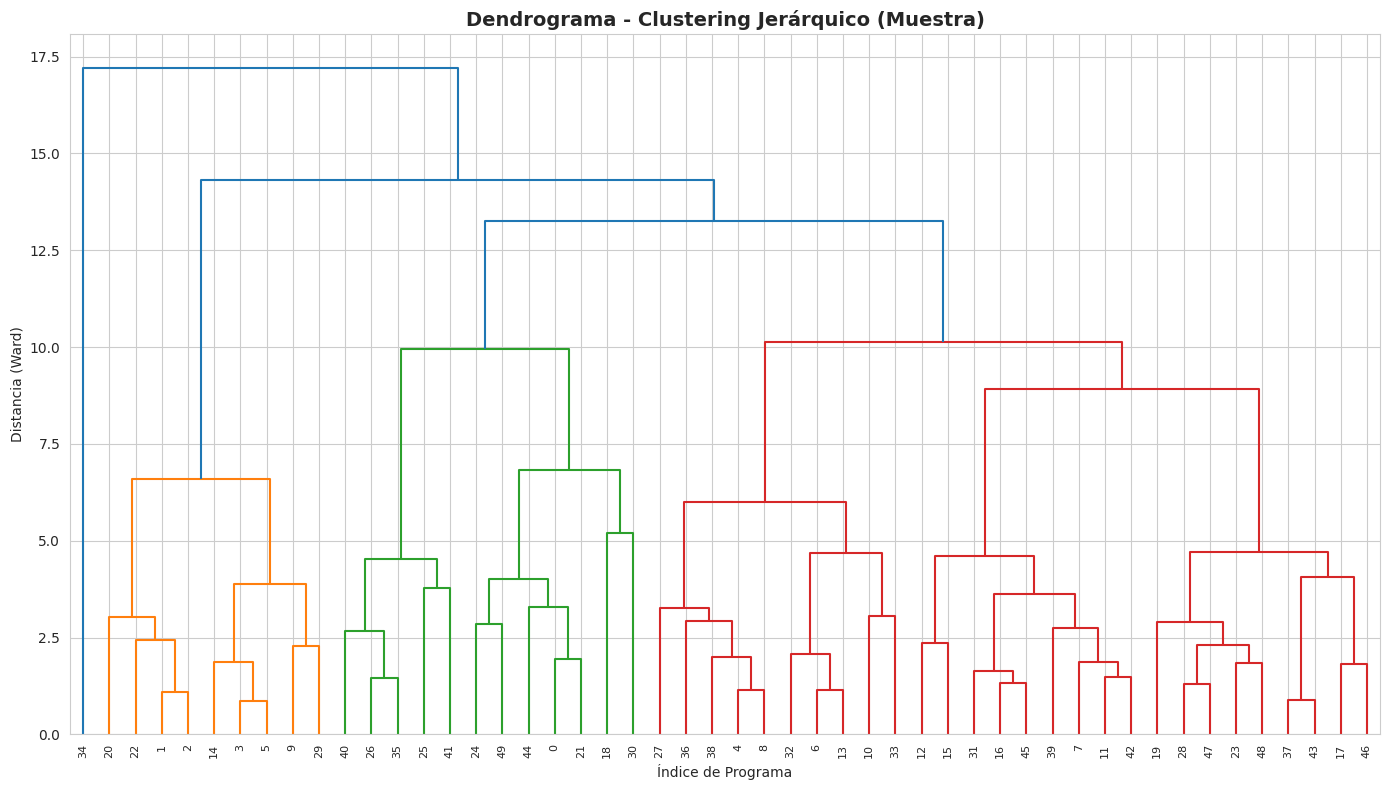

In [16]:
print('\n🌳 CLUSTERING JERÁRQUICO')
print('='*100)

# Calcular matriz de distancias y linkage
# Usar muestra para visualización clara
sample_size = min(50, len(df_scaled))  # Máximo 50 para claridad
sample_indices = np.random.choice(len(df_scaled), sample_size, replace=False)
df_sample = df_scaled[sample_indices]

linkage_matrix = linkage(df_sample, method='ward')
print(f'\n  Linkage matrix calculada (muestra: {sample_size} programas)')

# Dendrograma
fig, ax = plt.subplots(figsize=(14, 8))
dendrogram(linkage_matrix, ax=ax, truncate_mode=None)
ax.set_title('Dendrograma - Clustering Jerárquico (Muestra)', fontsize=14, fontweight='bold')
ax.set_xlabel('Índice de Programa')
ax.set_ylabel('Distancia (Ward)')
plt.tight_layout()
plt.savefig('08_dendrograma_jerarquico.png', dpi=300, bbox_inches='tight')
print('✅ Dendrograma guardado: 08_dendrograma_jerarquico.png')
plt.show()

## 9. Resumen e Interpretación

In [17]:
print('\n' + '='*100)
print('📊 RESUMEN EJECUTIVO - ANÁLISIS MULTIVARIANTE')
print('='*100)

print('\n1. MATRIZ DE CORRELACIONES:')
print('   • Correlaciones fuertes (|r| > 0.5): Identifica relaciones principales')
print('   • Correlaciones moderadas (0.3 < |r| ≤ 0.5): Relaciones secundarias')
print('   • Variables clave:', key_vars)

print('\n2. VISUALIZACIONES:')
print('   ✓ Heatmap: Estructura completa de correlaciones')
print('   ✓ Pairplot: Relaciones bivariantes entre variables clave')
print('   ✓ Biplot PCA: Cargas de variables en componentes principales')

print('\n3. REDUCCIÓN DE DIMENSIONALIDAD (PCA):')
print(f'   • PC1 explica: {pca_2d.explained_variance_ratio_[0]*100:.1f}%')
print(f'   • PC2 explica: {pca_2d.explained_variance_ratio_[1]*100:.1f}%')
print(f'   • Total 2D: {pca_2d.explained_variance_ratio_.sum()*100:.1f}%')
print(f'   • Componentes para 95% varianza: {np.argmax(cum_var_exp >= 0.95) + 1}')

print('\n4. AGRUPAMIENTOS (K-MEANS k=3):')
for i in range(k_optimal):
    count = np.sum(clusters == i)
    print(f'   • Cluster {i+1}: {count} programas ({count/len(clusters)*100:.1f}%)')

print('\n5. INTERPRETACIÓN:')
print('   • PCA permite visualizar relaciones en 2D con explicación de varianza')
print('   • K-means identifica 3 grupos de programas similares')
print('   • Clustering jerárquico muestra estructura de similitud')

print('\n✅ ANÁLISIS COMPLETADO')


📊 RESUMEN EJECUTIVO - ANÁLISIS MULTIVARIANTE

1. MATRIZ DE CORRELACIONES:
   • Correlaciones fuertes (|r| > 0.5): Identifica relaciones principales
   • Correlaciones moderadas (0.3 < |r| ≤ 0.5): Relaciones secundarias
   • Variables clave: ['satisfaccion_alumnos', 'satisfaccion_profesores', 'tasa_abandono', 'autoeficacia_3_anos', 'porcentaje_no_desempleados']

2. VISUALIZACIONES:
   ✓ Heatmap: Estructura completa de correlaciones
   ✓ Pairplot: Relaciones bivariantes entre variables clave
   ✓ Biplot PCA: Cargas de variables en componentes principales

3. REDUCCIÓN DE DIMENSIONALIDAD (PCA):
   • PC1 explica: 26.3%
   • PC2 explica: 20.3%
   • Total 2D: 46.6%
   • Componentes para 95% varianza: 7

4. AGRUPAMIENTOS (K-MEANS k=3):
   • Cluster 1: 66 programas (13.7%)
   • Cluster 2: 159 programas (32.9%)
   • Cluster 3: 258 programas (53.4%)

5. INTERPRETACIÓN:
   • PCA permite visualizar relaciones en 2D con explicación de varianza
   • K-means identifica 3 grupos de programas similare

In [18]:
# Exportar resultados
print('\n💾 EXPORTANDO RESULTADOS')
print('='*100)

# Guardar matriz de correlaciones
corr_matrix.to_csv('correlations_matrix.csv')
print('  ✓ correlations_matrix.csv')

# Guardar loadings PCA
loading_matrix.to_csv('pca_loadings.csv')
print('  ✓ pca_loadings.csv')

# Guardar clusters
cluster_results = df[['TITULACION', 'CENTRO', 'año', 'cluster']].copy()
cluster_results.to_csv('kmeans_clusters.csv', index=False)
print('  ✓ kmeans_clusters.csv')

# Guardar PCA scores
pca_scores = pd.DataFrame(points_2d, columns=['PC1', 'PC2'])
pca_scores.to_csv('pca_scores.csv', index=False)
print('  ✓ pca_scores.csv')

print('\n✅ ARCHIVOS GUARDADOS')


💾 EXPORTANDO RESULTADOS
  ✓ correlations_matrix.csv
  ✓ pca_loadings.csv
  ✓ kmeans_clusters.csv
  ✓ pca_scores.csv

✅ ARCHIVOS GUARDADOS
